In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
from mnist import MNIST

In [3]:
mndata = MNIST('mnist')
images, labels = mndata.load_training()

In [4]:
def sig(x):
    return 1/(1 + np.exp(-x))
sig(5)

def sigmoid_derivative(x):
    ans = sig(x) * (1-sig(x))
    return ans
sigmoid_derivative(6)

0.002466509291359931

In [5]:
weight1 = np.random.rand(784, 500)* 2 - 1
weight2 = np.random.rand(500, 10)* 2 - 1

In [6]:
def ind(num):
    vector = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    vector[num] = 1
    return vector

print(ind(9))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [7]:
modLabels = []

for i in range(len(labels)):
    modLabels.append(ind(labels[i]))

In [8]:
learnRate = 0.0000001
batchSize = 1000
errorList = []
error = 1

for i in range(300):
    interval = random.randint(0, 60000-batchSize)
    im = np.array(images[interval:interval + batchSize])
    intermediate = sig(np.dot(im, weight1))
    result = sig(np.dot(intermediate, weight2))
    error = np.sum((modLabels[interval:interval + batchSize] - result)**2)/batchSize
    errorList.append(error)
    
    d_weights1 = np.dot(im.T,  (np.dot(2*(modLabels[interval:interval + batchSize] - result) * sigmoid_derivative(result), weight2.T) * sigmoid_derivative(intermediate))) * learnRate
    d_weights2 = np.dot(intermediate.T, (2*(modLabels[interval:interval + batchSize] - result) * sigmoid_derivative(result))) * learnRate
    weight1 += d_weights1
    weight2 += d_weights2

C:\Users\Nated\AppData\Local\Temp/ipykernel_15760/2767602098.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


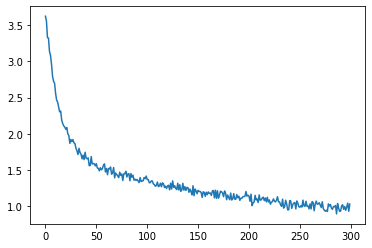

In [9]:
 plt.plot(errorList)